# Proyecto 2-Parte II (core)
Proyecto 2: Análisis y Selección de Problema

Parte II: Preprocesamiento y Optimización

## Objetivo:
Realizar el preprocesamiento de datos y la optimización de modelos de machine learning para el conjunto de datos seleccionado. La meta es elegir la técnica de machine learning más adecuada y optimizar sus hiperparámetros para obtener el mejor rendimiento posible.



### Dataset seleccionado:
Seleccioné el archivo de satisfaction

https://www.kaggle.com/datasets/pooriamst/online-shopping/data

En el archivo 6_(Core)_Proyecto_2_Parte_I_Alexander_Marín.ipynb corresponde al df_satisfaction

In [1]:
# Instalar la API de Kaggle
!pip install kaggle

# Crear el directorio para las credenciales de Kaggle
!mkdir -p ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d pooriamst/online-shopping
!unzip online-shopping.zip

Dataset URL: https://www.kaggle.com/datasets/pooriamst/online-shopping
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/6.96k [00:00<?, ?B/s]
100% 6.96k/6.96k [00:00<00:00, 8.65MB/s]
Archive:  online-shopping.zip
  inflating: AI in Retail Dataset.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lee el archivo CSV
df = pd.read_csv('/content/AI in Retail Dataset.csv', encoding='latin-1')

### Recapitulando información previa del dataset


In [5]:
print(df.info())
print("\n")
print(df.describe(include='all').round(2))
print("\n")
print("Valores nulos:")
print(df.isnull().sum() * 100 / len(df))
print("\n")
print("Valores duplicados:")
print(df.duplicated().sum())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           656 non-null    object
 1   Online_Consumer                   656 non-null    object
 2   Age                               656 non-null    object
 3   Annual_Salary                     656 non-null    object
 4   Gender                            656 non-null    object
 5   Education                         656 non-null    object
 6   Payment_Method_Credit/Debit       656 non-null    object
 7   Living_Region                     656 non-null    object
 8   Online_Service_Preference         656 non-null    object
 9   AI_Endorsement                    656 non-null    object
 10  AI_Privacy_No_Trust               656 non-null    object
 11  AI_Enhance_Experience             656 non-null    object
 12  AI_Satisfication      

In [6]:
def uniq (df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df

uniq(df)

,val,types,len
feature,,,
Country,"[INDIA, CHINA, CANADA]",object,3
Online_Consumer,"[YES, NO]",object,2
Age,"[Gen X, Gen Z, Millennials, Baby Boomers]",object,4
Annual_Salary,"[Medium High, Low, High, Medium]",object,4
Gender,"[Female, Male, Prefer not to say]",object,3
Education,"[Masters Degree, University Graduate, Highsch...",object,4
Payment_Method_Credit/Debit,"[NO, YES]",object,2
Living_Region,"[Metropolitan, Rural Areas, Suburban Areas]",object,3
Online_Service_Preference,"[NO, YES]",object,2


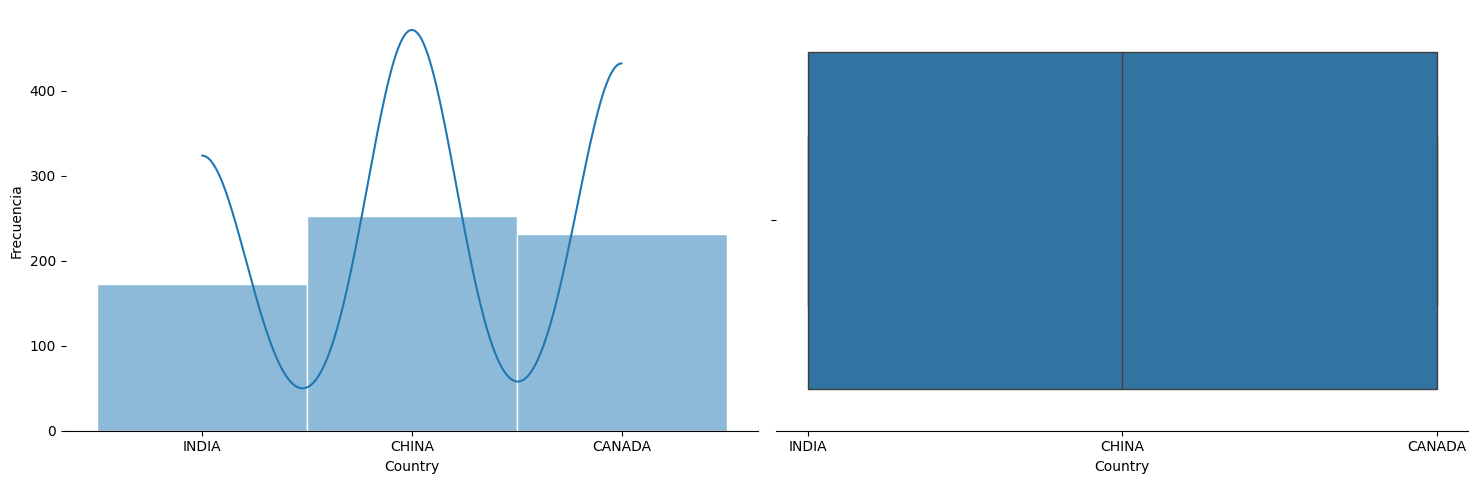

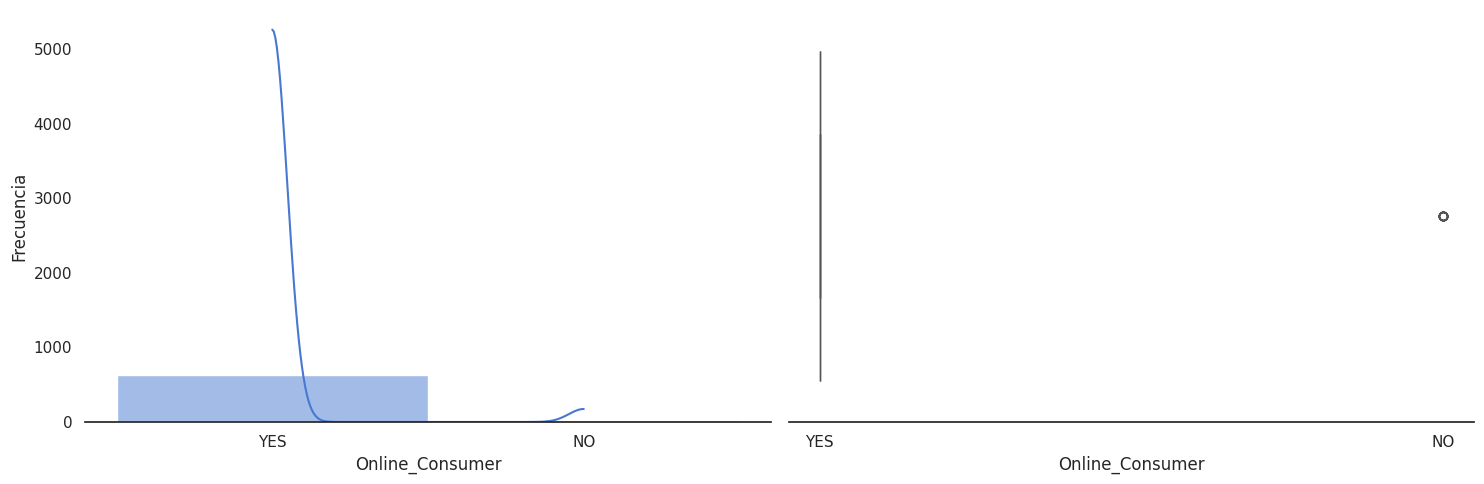

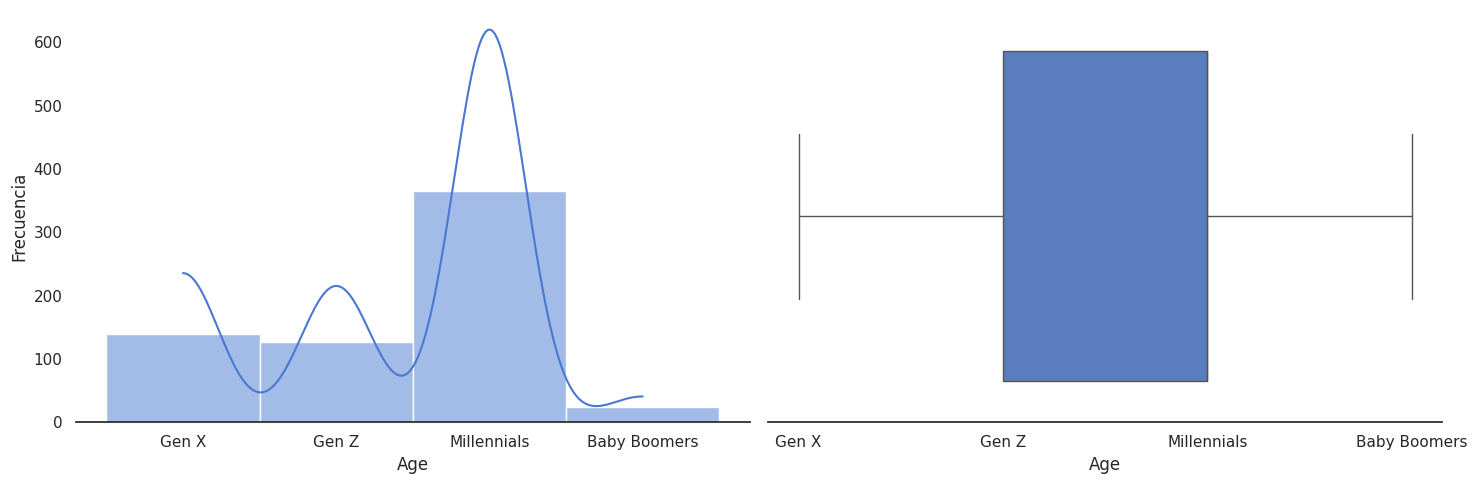

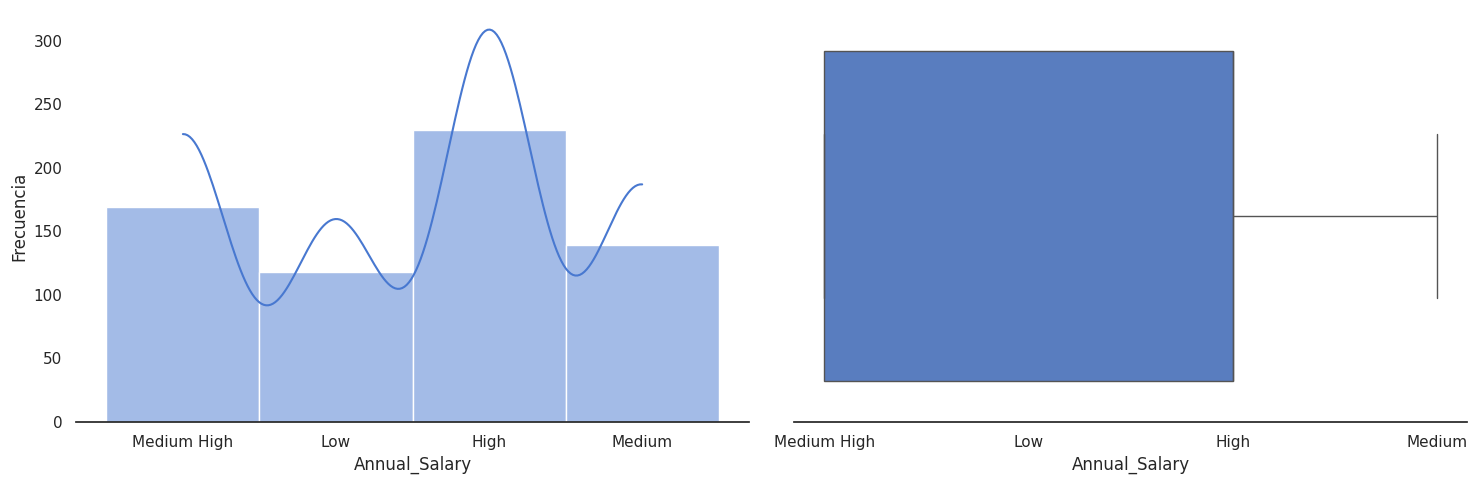

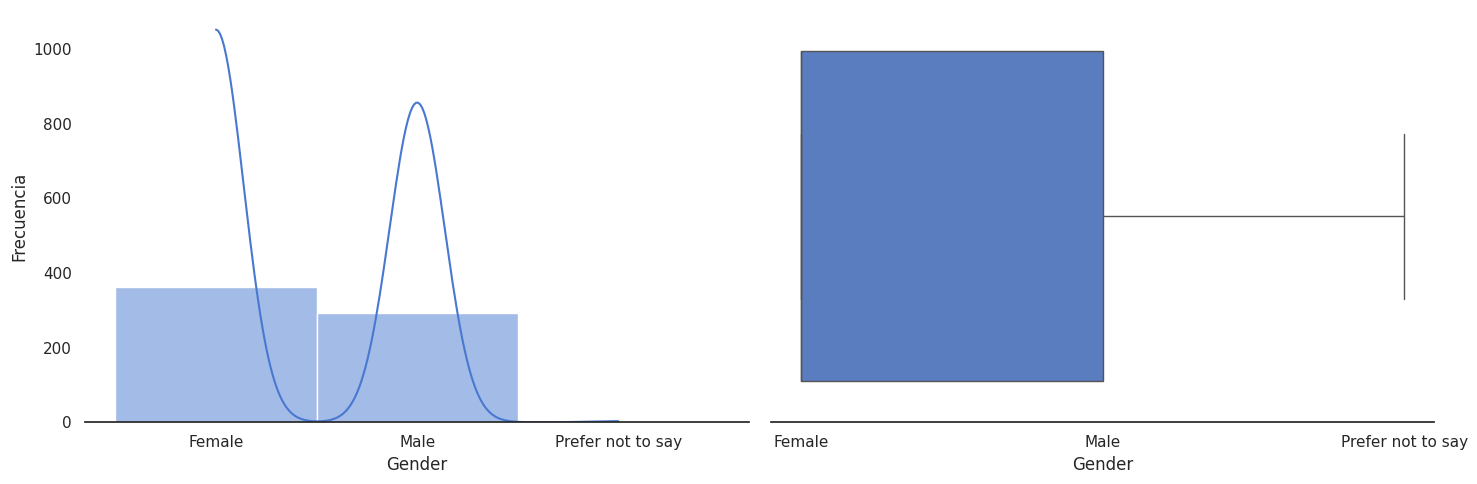

<ipython-input-7-6c373977ab47>:13: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


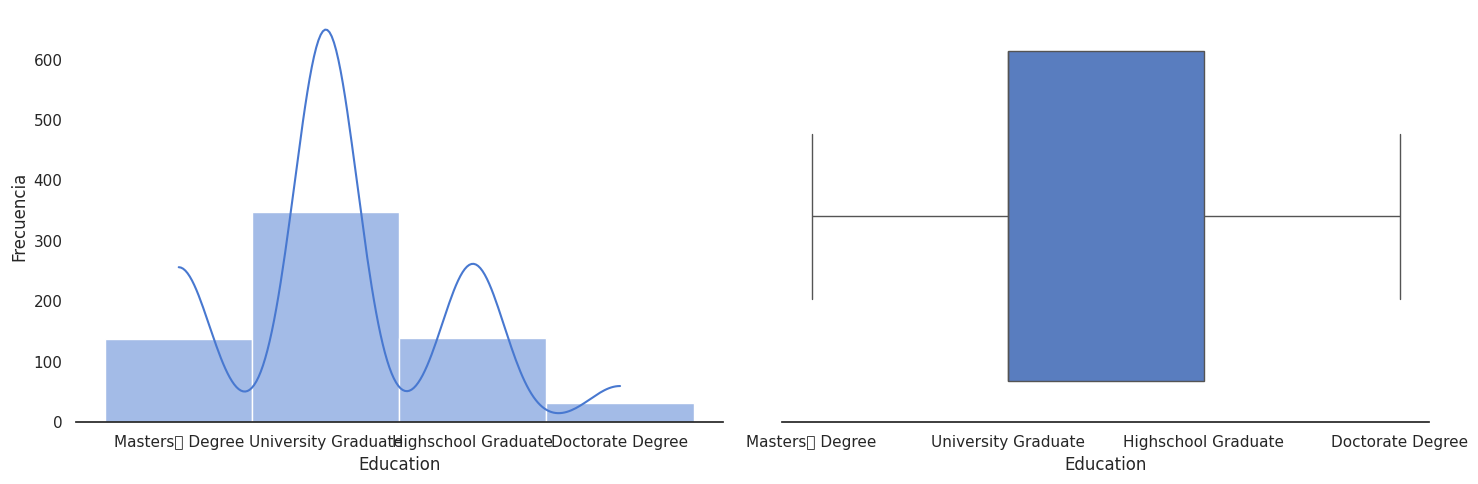

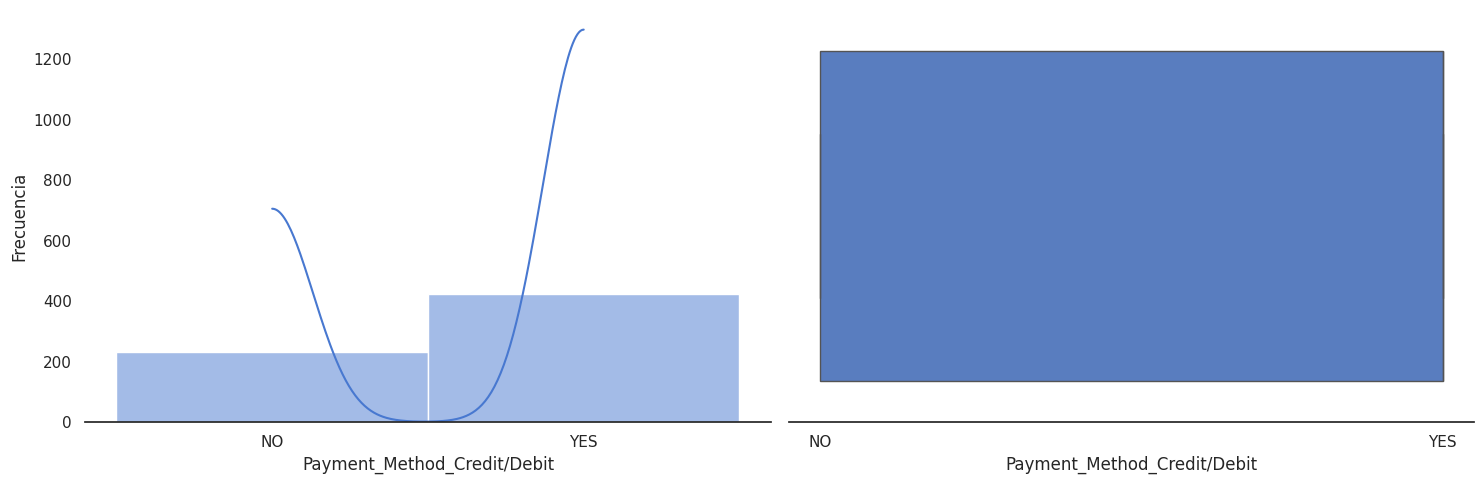

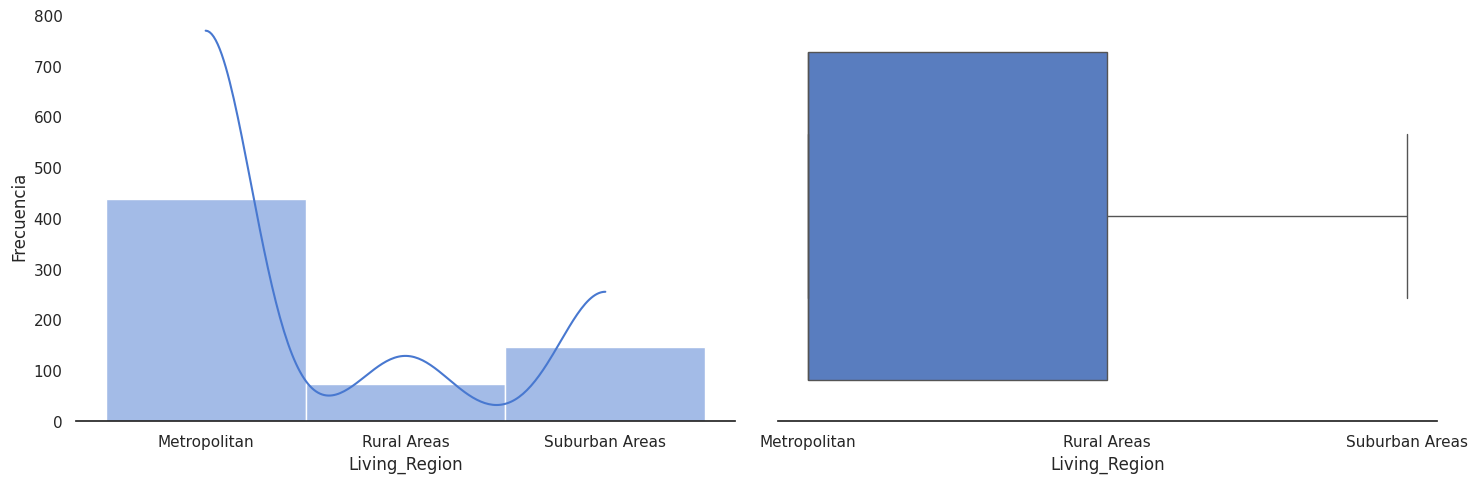

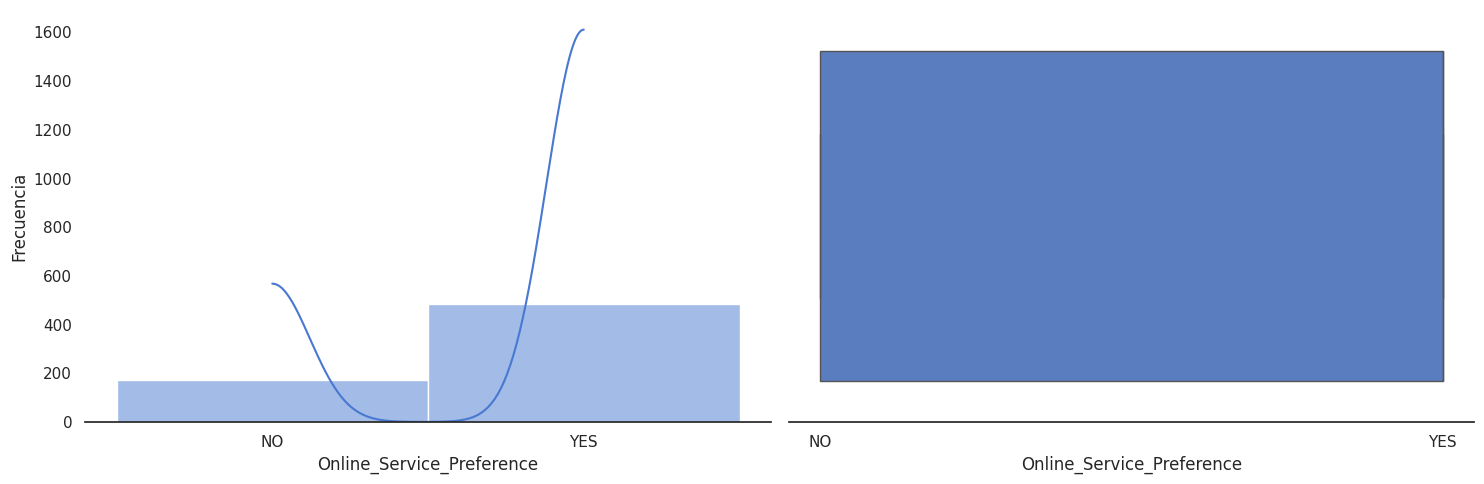

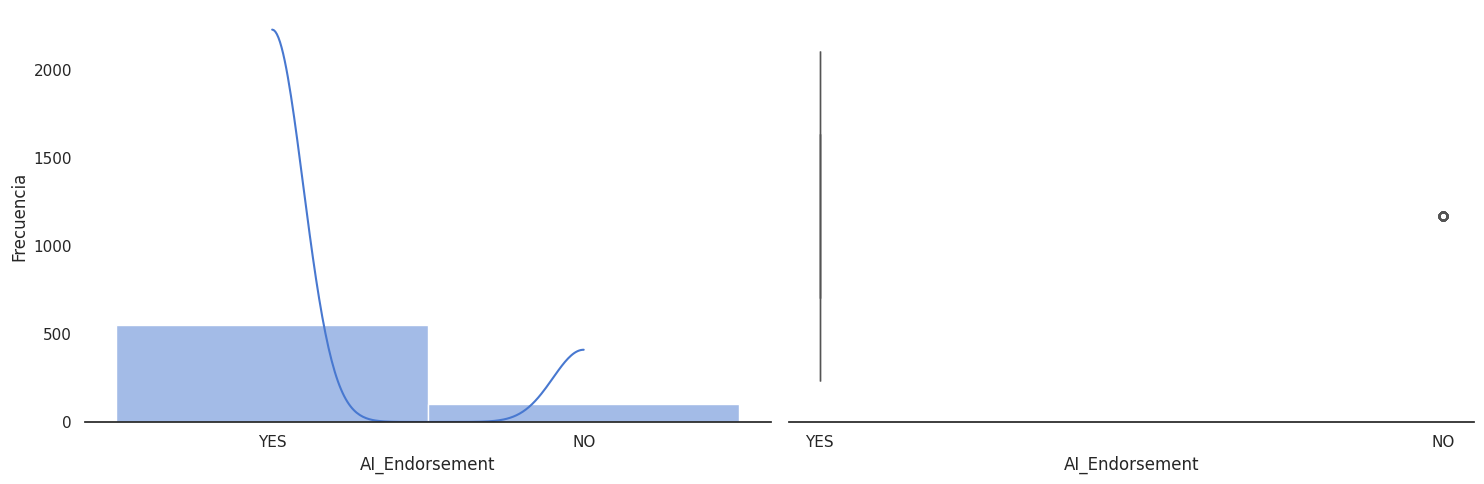

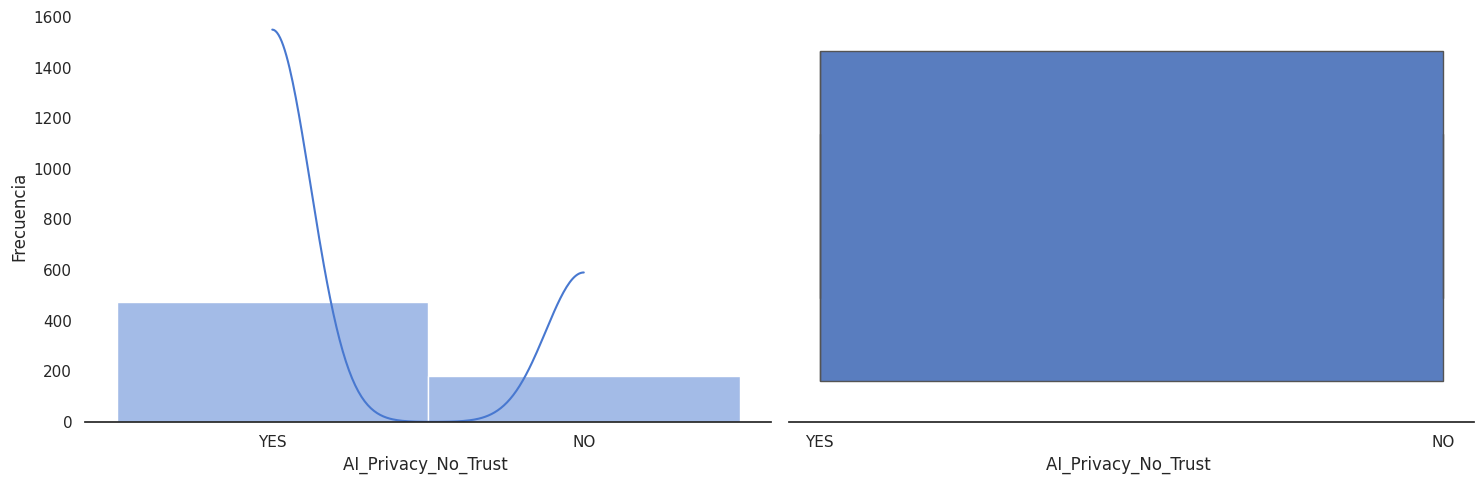

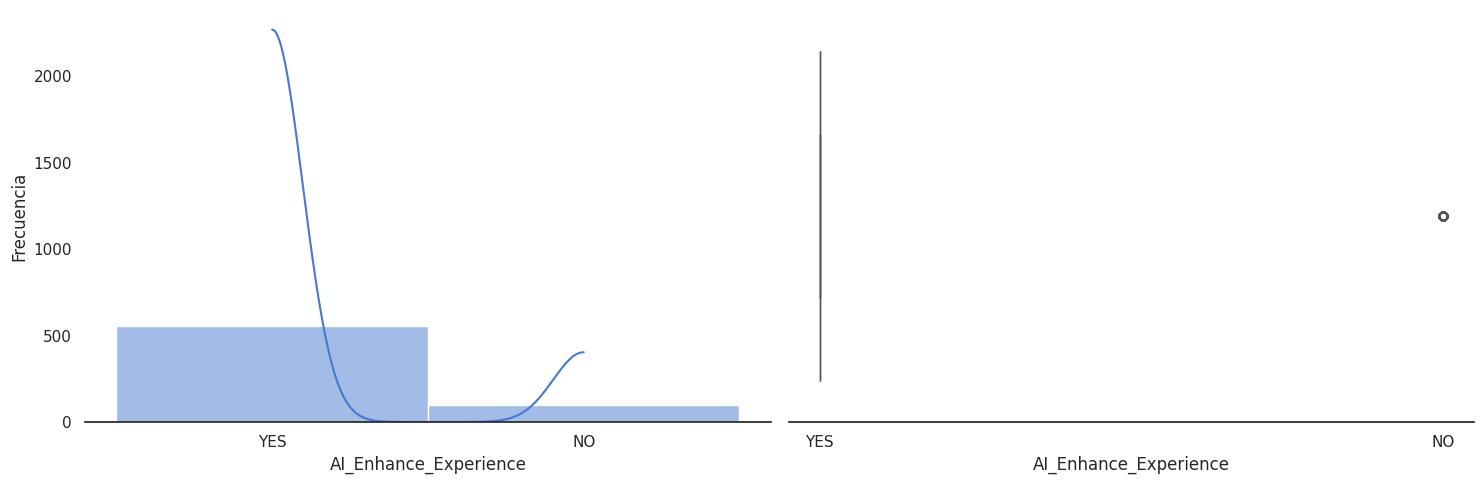

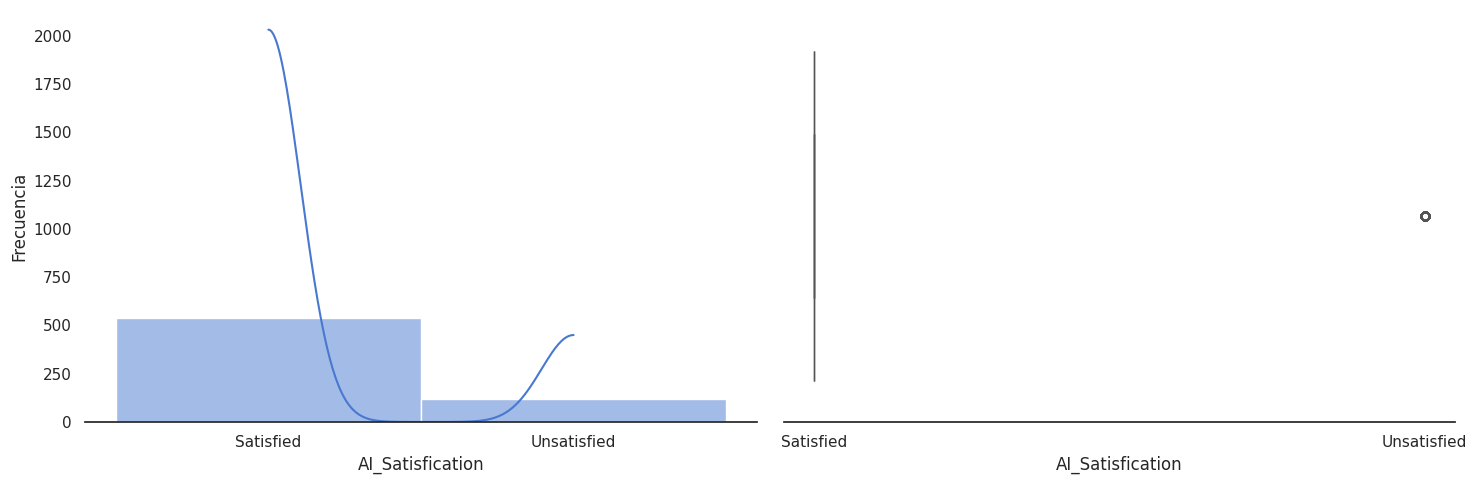

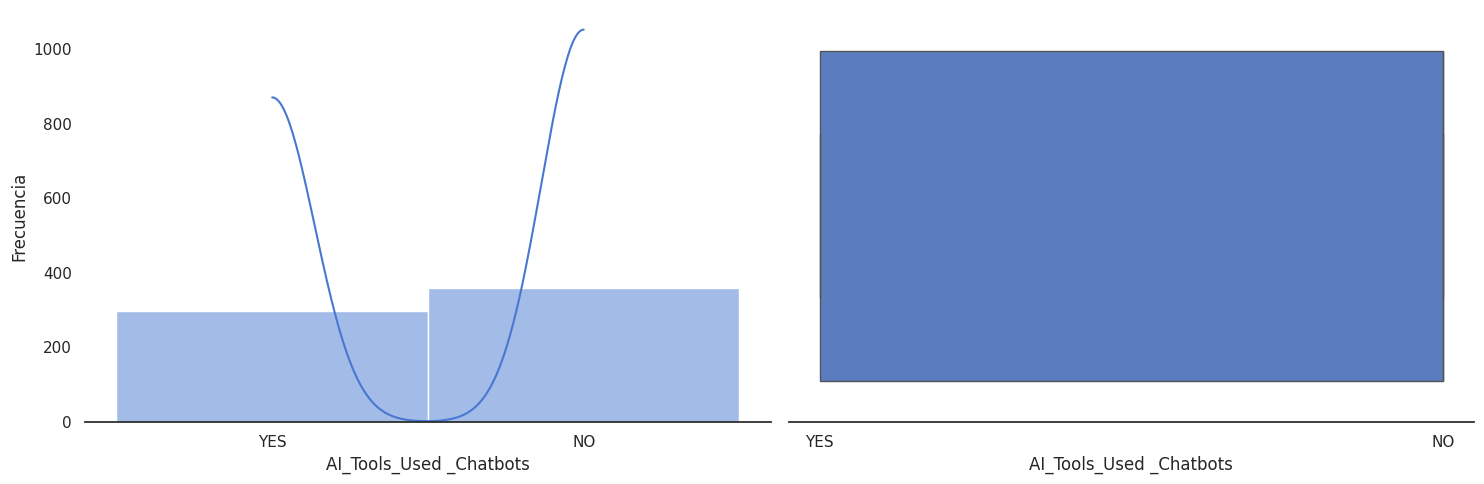

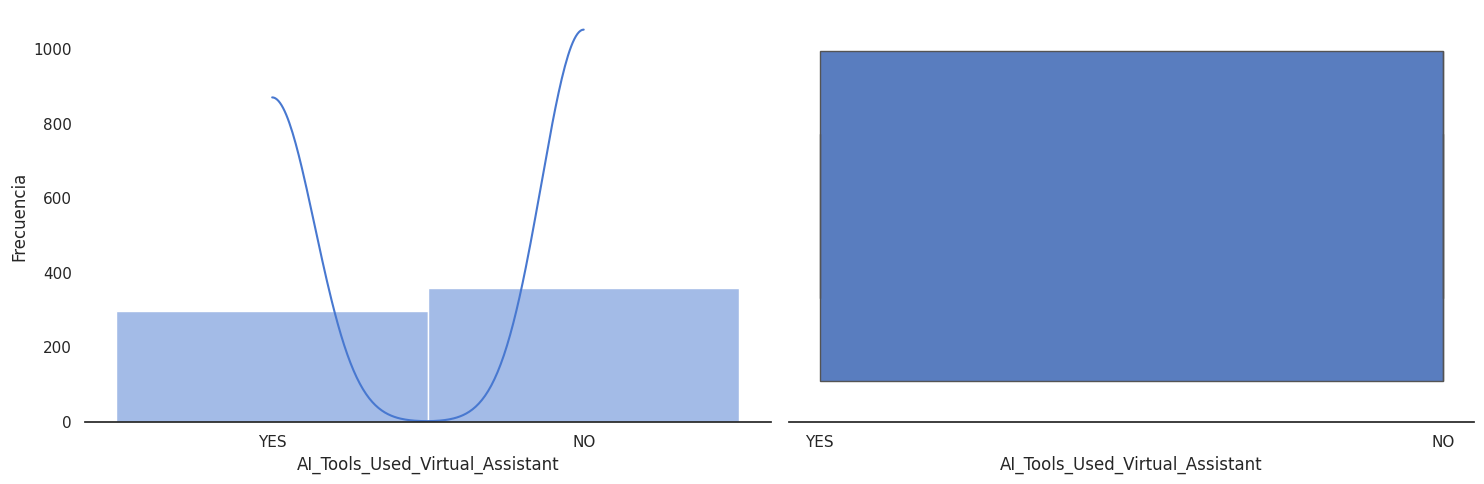

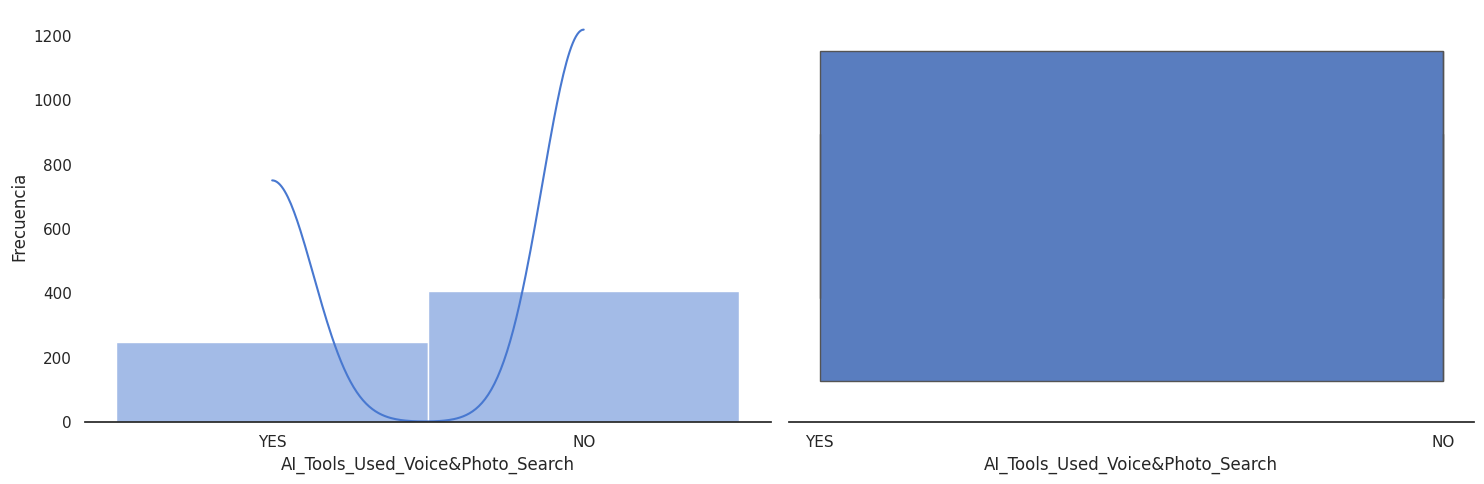

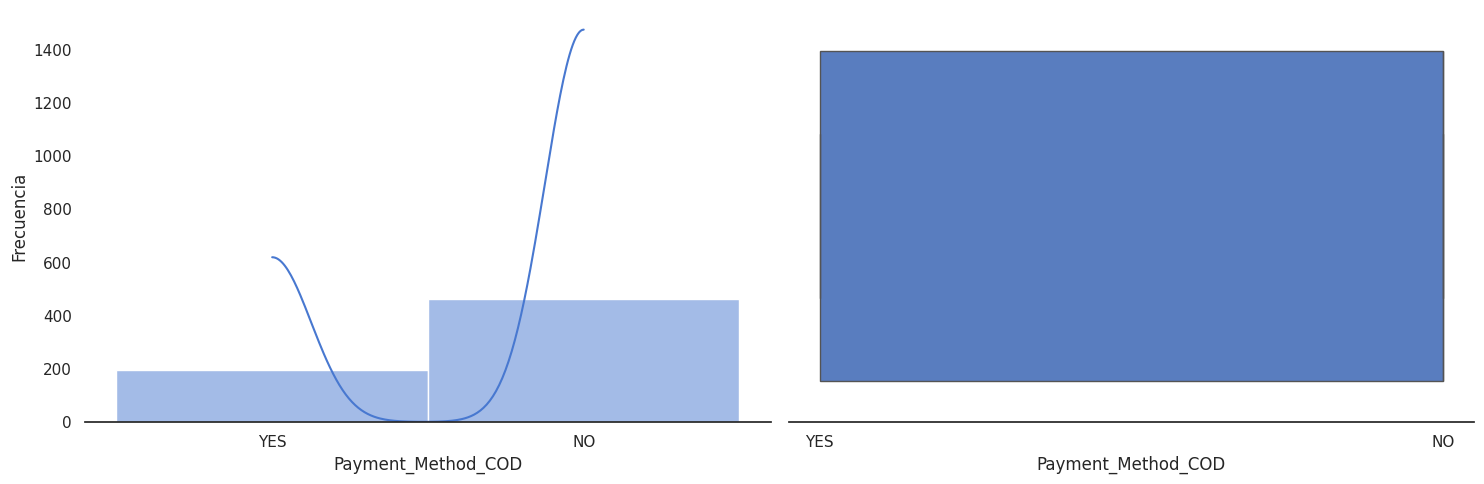

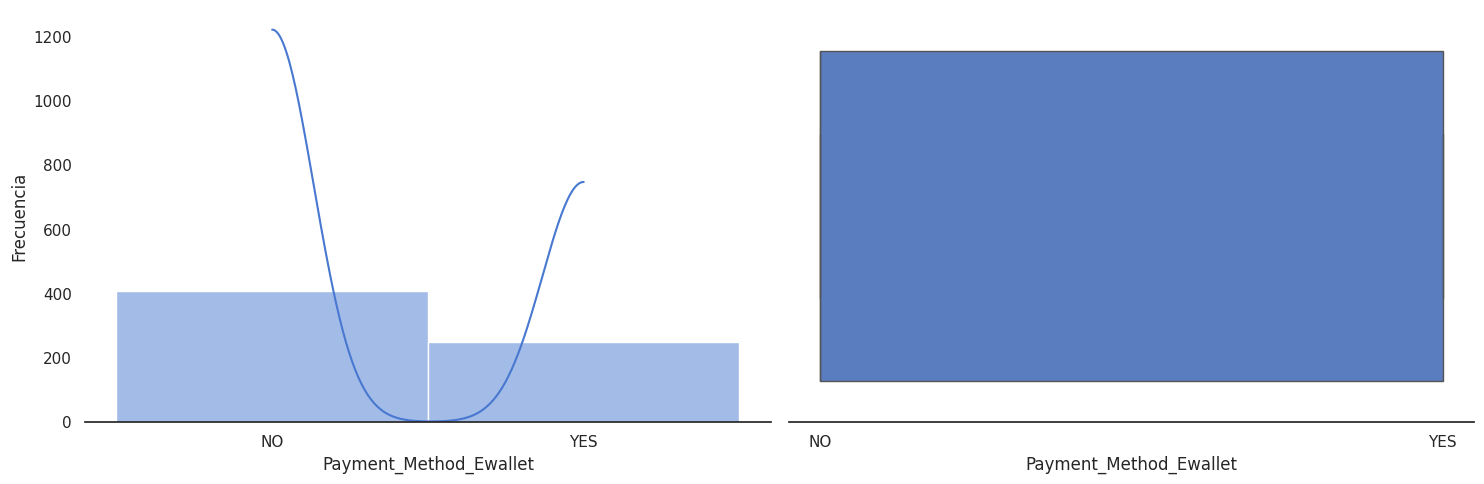

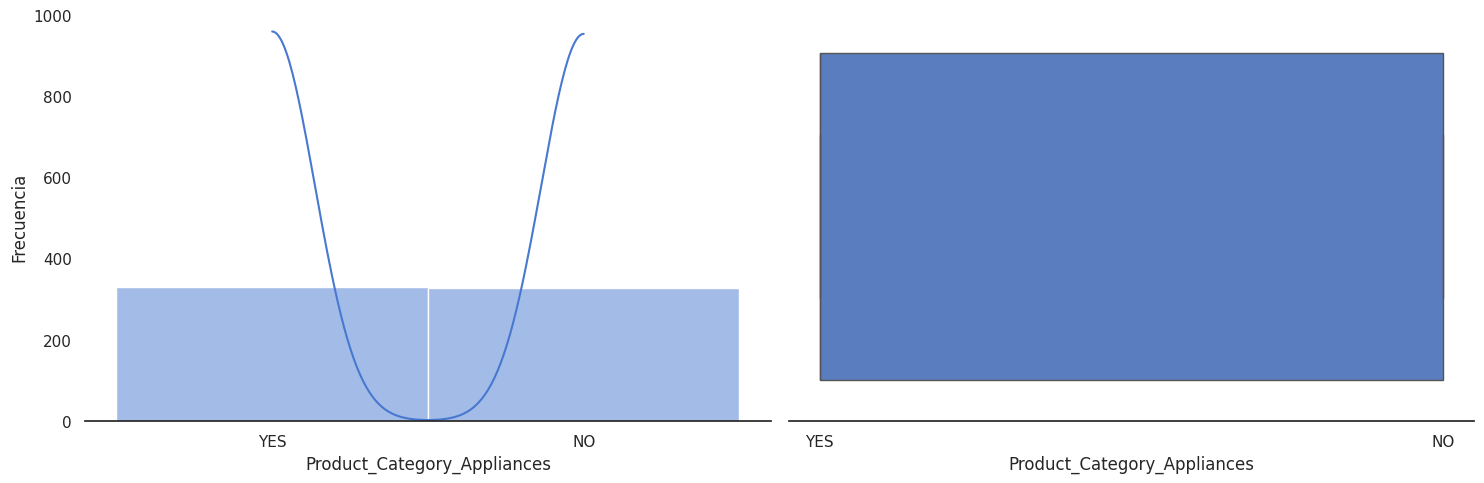

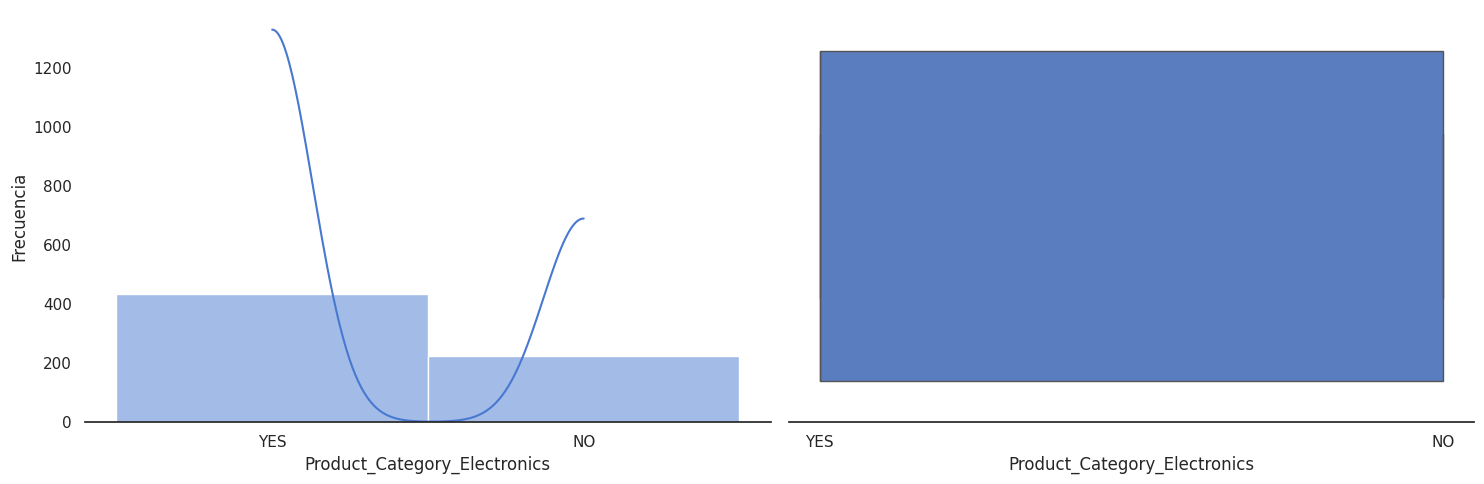

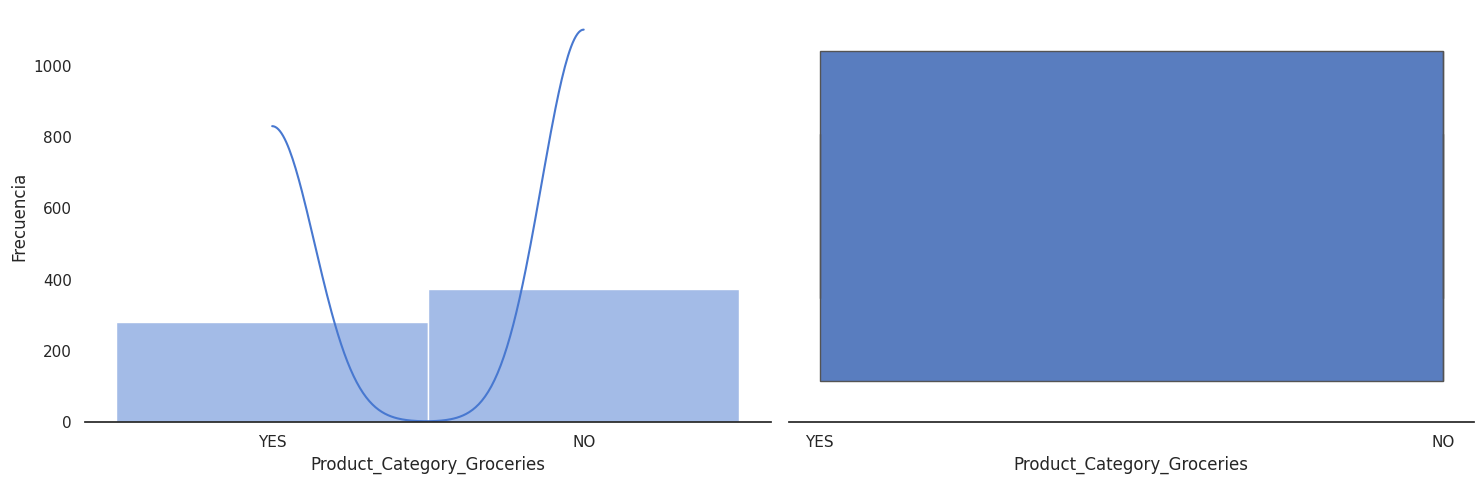

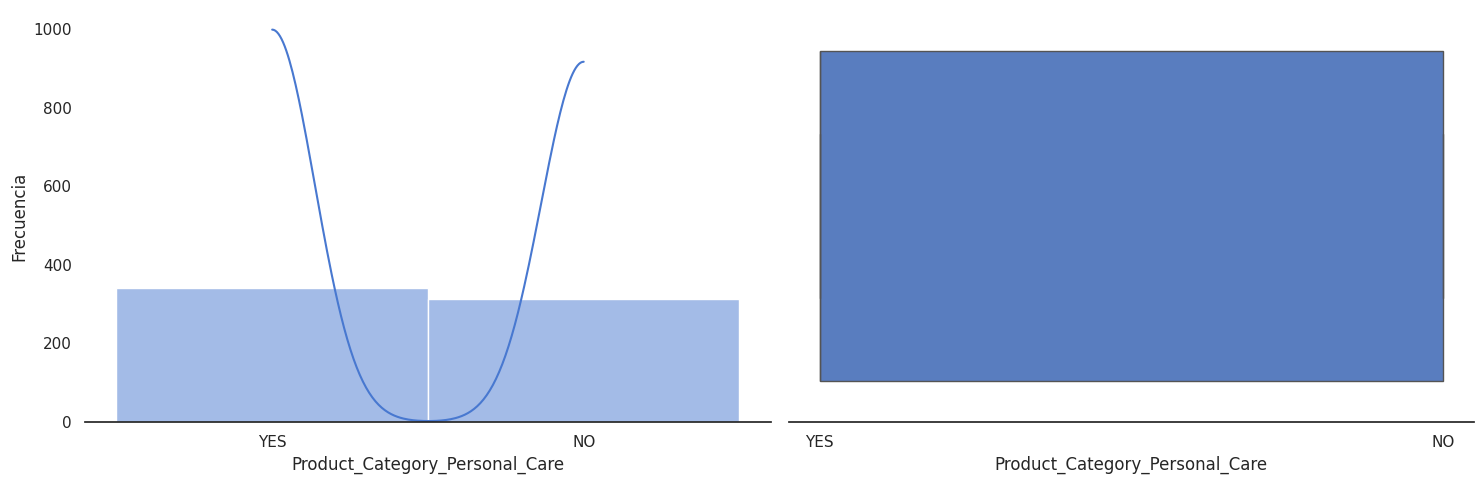

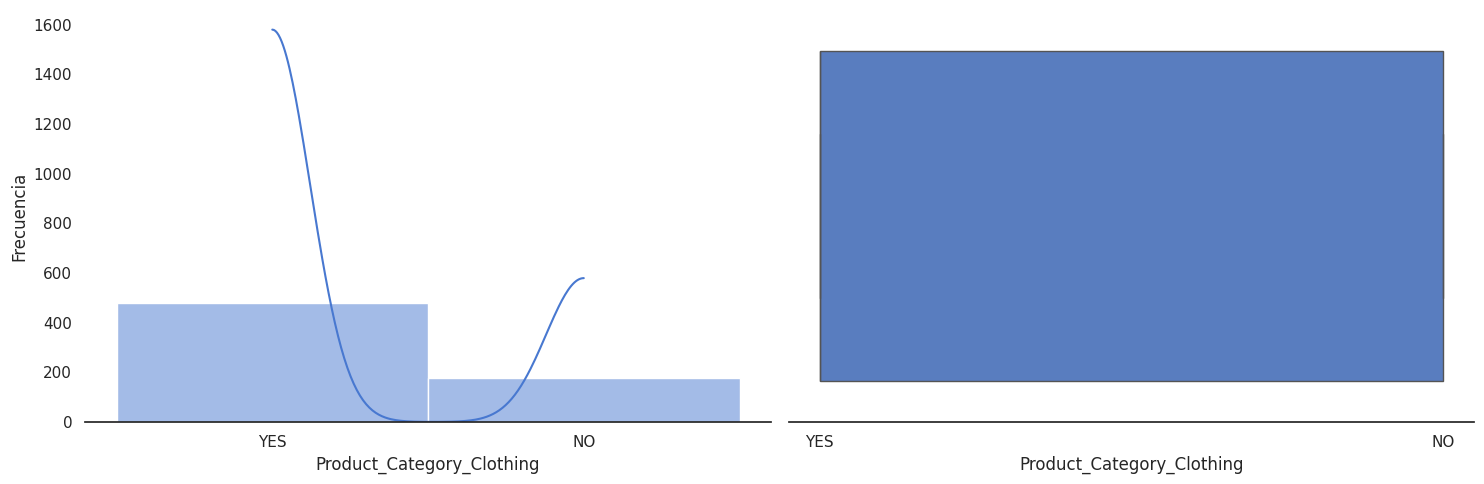

In [7]:
def vis_hist_boxplot(df):
    for i in df.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set(style="white", palette="muted", color_codes=True)
        sns.despine(left=True)

        # Histograma con kde
        sns.histplot(data=df, x=i, kde=True, ax=ax[0]).set_xlabel(f"{i}")
        ax[0].set_ylabel('Frecuencia')
        # Boxplot
        sns.boxplot(data=df, x=i, ax=ax[1])

        plt.tight_layout()
        plt.show()

vis_hist_boxplot(df)

In [8]:
def unique_and_count(df, column_name):

  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in DataFrame.")
    return None

  unique_values = df[column_name].unique()
  value_counts = df[column_name].value_counts()

  result = {
      'unique_values': unique_values,
      'value_counts': value_counts
  }

  return result

unique_and_count(df, 'AI_Satisfication')

{'unique_values': array(['Satisfied', 'Unsatisfied'], dtype=object),
 'value_counts': AI_Satisfication
 Satisfied      537
 Unsatisfied    119
 Name: count, dtype: int64}

In [9]:
# Esto es código de Claude
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(var1, var2):
    crosstab = pd.crosstab(var1, var2)
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    min_dim = min(crosstab.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Seleccionar todas las columnas categóricas excepto la variable objetivo
target_col = 'AI_Satisfication'
categorical_cols = df.select_dtypes(include=['object','int','float']).columns
other_cols = [col for col in categorical_cols if col != target_col]

# Calcular V de Cramer para cada columna con respecto a AI_Satisfication
cramer_scores = {}
for col in other_cols:
    cramer_scores[col] = cramers_v(df[target_col], df[col])

# Convertir a Series y ordenar
cramer_results = pd.Series(cramer_scores).sort_values(ascending=False)

print(f"\nAsociaciones con {target_col} usando V de Cramer:")
print(cramer_results)

# V de Cramer: medida estadística evalúa fuerza de asociación entre variables categóricas, basada en estadística chi-cuadrado.
# Sus valores van de 0 a 1, donde: 0 significa que no hay asociación, 1 significa una asociación perfecta…
# < 0.1: asociación muy débil, 0.1 - 0.3: asociación débil, 0.3 - 0.5: asociación moderada, >0.5: asociación fuerte

# La ventaja del V de Cramer es que:
# Funciona con variables categóricas de cualquier número de categorías
# Es simétrica (el orden de las variables no importa)
# Es normalizada (siempre va de 0 a 1)
# No asume ninguna distribución específica de los datos


Asociaciones con AI_Satisfication usando V de Cramer:
AI_Enhance_Experience               0.470118
Online_Service_Preference           0.328724
Education                           0.206223
Country                             0.165051
Product_Category_Groceries          0.149070
AI_Privacy_No_Trust                 0.138650
Age                                 0.130263
Product_Category_Clothing           0.130113
Payment_Method_Ewallet              0.127730
Annual_Salary                       0.114793
AI_Endorsement                      0.109133
AI_Tools_Used_Voice&Photo_Search    0.088382
Living_Region                       0.070235
Payment_Method_Credit/Debit         0.053039
AI_Tools_Used _Chatbots             0.050676
Product_Category_Appliances         0.040994
Product_Category_Electronics        0.040592
Gender                              0.039655
Online_Consumer                     0.037990
Product_Category_Personal_Care      0.035949
AI_Tools_Used_Virtual_Assistant     0.010940


**Profundización de la prueba anterior**

Cramér's V (V de Cramer) es una medida de asociación utilizada para cuantificar la fuerza de la relación entre dos variables categóricas. Aunque no es una correlación en el sentido tradicional (como la correlación de Pearson que mide la relación entre variables numéricas), se puede considerar como un índice que refleja el grado de dependencia o asociación entre dos variables categóricas.

Cramér's V no es una prueba estadística en sí misma, sino una medida derivada de la prueba de chi-cuadrado.

Se utiliza para medir la fuerza de la asociación entre dos variables categóricas.

El valor de Cramér's V te permite determinar si hay una relación significativa entre las variables y cuán fuerte es esa relación.

### Análisis previos
-	656 entradas en 23 columnas, donde todas son categóricas, donde la variable objetivo es “AI_Satisfication”, el dataset parecen ser datos demográficos sumados a una especie de encuesta de varias preguntas de YES/NO
-	Hay registros duplicados (8) y no parece haber datos nulos, pero como son variables categóricas, toca revisar puntualmente cada una a ver si hay opciones no válidas o que estén erradas ------- SE DEBEN REVISAR VALORES ÚNICOS EN VARIABLES CATEGÓRICAS Y CASO TAL CORREGIR, ELIMINAR DUPLICADOS -------
-	en cuanto a la variable objetivo hay 2 posibles respuestas, por lo que es binaria,
-	con el histograma y boxplot, se ven distribuciones de todas las columnas categóricas, y en la variable objetivo se debería revisar que las clases son desbalanceadas ------- SE DEBE REVISAR SI HAY QUE BALANCEAR CLASES EN LA VARIABLE OBJETIVO -------
-	No hay outliers que tratar o trabajar
-	Al revisar las correlaciones, se encuentra que como son todas las variables categóricas, tocaba aplicar otros métodos, más estadísticos. Con la ayuda de Claude se hizo una correlación con V de Cramer, una medida estadística que evalúa la fuerza de asociación entre variables categóricas, basada en la estadística chi-cuadrado. Sus valores van de 0 a 1, donde: 0 significa que no hay asociación, 1 significa una asociación perfecta… < 0.1: asociación muy débil, 0.1 - 0.3: asociación débil, 0.3 - 0.5: asociación moderada, >0.5: asociación fuerte
-	Asociaciones más fuertes: AI_Enhance_Experience (0.47): Tiene una asociación moderada-fuerte con la satisfacción.  Online_Service_Preference (0.33): Muestra una asociación moderada
-	Asociaciones débiles: Education (0.21), Country (0.17), y Product_Category_Groceries (0.15)

# Parte 1: Preprocesamiento de Datos



## 1) Limpieza de Datos:
- Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).
- Manejar los outliers mediante técnicas de filtrado o transformación.



In [10]:
# No hay nulos, ni outliers, ni corregir valores en variables categóricas, tratar solo duplicados
df.drop_duplicates(inplace=True)

print("\nValores duplicados después de eliminarlos:")
print(df.duplicated().sum())


Valores duplicados después de eliminarlos:
0


In [11]:
# ESTE CÓDIGO SE CORRE LA SEGUNDA VEZ, PRIMERO SE REVISÓ CON TODAS LAS CARACTERÍSTICAS Y LUEGO CON AQUELLAS CON CORRELACIÓN SUPERIOR AL 10%

# Define the threshold for correlation
threshold = 0.1

# Filter the Cramer's V results based on the threshold
selected_columns = cramer_results[cramer_results > threshold].index

# Select the columns from the DataFrame
df_selected = df[selected_columns]
df_selected['AI_Satisfication'] = df['AI_Satisfication']

# Print or further process the selected columns
print("\nSelected columns based on Cramer's V > 0.1:")
print(df_selected)


Selected columns based on Cramer's V > 0.1:
    AI_Enhance_Experience Online_Service_Preference            Education  \
0                     YES                        NO      Masters Degree   
1                     YES                        NO  University Graduate   
2                     YES                       YES  University Graduate   
3                     YES                       YES  University Graduate   
4                     YES                       YES  University Graduate   
..                    ...                       ...                  ...   
650                   YES                       YES      Masters Degree   
651                   YES                       YES  Highschool Graduate   
653                   YES                       YES  University Graduate   
654                   YES                        NO  Highschool Graduate   
655                   YES                       YES  University Graduate   

    Country Product_Category_Groceries AI_

<ipython-input-11-47d0abc75a9f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['AI_Satisfication'] = df['AI_Satisfication']


## 2) Transformación de Columnas:
- Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
- Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.
- Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#df_ohe = df.copy()
df_ohe = df_selected.copy()

# Crear el ColumnTransformer
exclude_column = 'AI_Satisfication'
transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False), [col for col in df_ohe.columns if col != exclude_column])  # One-Hot Encoding a todas menos la excluida
    ],
    remainder='passthrough'  # Dejar las columnas restantes sin transformar
)

# Aplicar el ColumnTransformer
transformed_array = transformer.fit_transform(df_ohe)

# Obtener los nombres de las columnas transformadas
column_names = transformer.named_transformers_['ohe'].get_feature_names_out(
    [col for col in df_ohe.columns if col != exclude_column]
)

# Crear el DataFrame final
df_ohe_f = pd.DataFrame(transformed_array, columns=list(column_names) + [exclude_column])

print(df_ohe_f)


    AI_Enhance_Experience_NO AI_Enhance_Experience_YES  \
0                        0.0                       1.0   
1                        0.0                       1.0   
2                        0.0                       1.0   
3                        0.0                       1.0   
4                        0.0                       1.0   
..                       ...                       ...   
643                      0.0                       1.0   
644                      0.0                       1.0   
645                      0.0                       1.0   
646                      0.0                       1.0   
647                      0.0                       1.0   

    Online_Service_Preference_NO Online_Service_Preference_YES  \
0                            1.0                           0.0   
1                            1.0                           0.0   
2                            0.0                           1.0   
3                            0.0       

Explicación:

- ColumnTransformer:

    - La transformación ohe aplica OneHotEncoder a todas las columnas excepto AI_Satisfication.
    - Usamos una lista por comprensión para incluir todas las columnas menos la excluida: [col for col in df.columns if col != exclude_column].

- remainder='passthrough':

    - Esto asegura que las columnas no incluidas en la transformación se mantendrán sin modificar en el resultado.

- Columnas finales:

    - Se obtienen los nombres generados por el codificador con get_feature_names_out.
    - La columna excluida se agrega manualmente al final.

- DataFrame final:

    - Combinamos los datos transformados con los nombres de columnas para obtener un DataFrame legible.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

#df_le = df.copy()
df_le = df_selected.copy()

# Columna a excluir
exclude_column = 'AI_Satisfication'

# Función para aplicar LabelEncoder
def apply_label_encoder(column):
    encoder = LabelEncoder()
    return encoder.fit_transform(column)

# Crear ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('label_encoder', FunctionTransformer(lambda x: x.apply(apply_label_encoder, axis=0)),
         [col for col in df_le.columns if col != exclude_column])  # Aplicar a todas menos la excluida
    ],
    remainder='passthrough'  # Dejar la columna excluida sin modificar
)

# Aplicar el ColumnTransformer
transformed_array = transformer.fit_transform(df_le)

# Crear un DataFrame con los nombres originales de las columnas
transformed_columns = [col for col in df_le.columns if col != exclude_column] + [exclude_column]
df_le_f = pd.DataFrame(transformed_array, columns=transformed_columns)

print(df_le_f)

    AI_Enhance_Experience Online_Service_Preference Education Country  \
0                       1                         0         2       2   
1                       1                         0         3       2   
2                       1                         1         3       2   
3                       1                         1         3       2   
4                       1                         1         3       2   
..                    ...                       ...       ...     ...   
643                     1                         1         2       0   
644                     1                         1         1       0   
645                     1                         1         3       0   
646                     1                         0         1       0   
647                     1                         1         3       0   

    Product_Category_Groceries AI_Privacy_No_Trust  Age  \
0                            1                    1   1   
1    

Explicación:

- LabelEncoder en columnas individuales:

    - Usamos apply_label_encoder para aplicar LabelEncoder a cada columna de manera individual.
    - Este paso asegura que cada columna categórica sea transformada a valores numéricos.

- FunctionTransformer:

    - Permite usar funciones personalizadas dentro del ColumnTransformer.
    - Aquí aplicamos la función apply_label_encoder a todas las columnas excepto la excluida.

- remainder='passthrough':

    - Esto mantiene la columna excluida (AI_Satisfication) sin modificar.

- Crear el DataFrame final:

    - Incluye las columnas transformadas y las no transformadas en un solo DataFrame.

## 3) Creación de Pipelines:
- Crear pipelines utilizando Pipeline de sklearn para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.
- Incluir todos los pasos de preprocesamiento en el pipeline.

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#df_ohe = df.copy()
df_ohe = df_selected.copy()

# Columna a excluir
exclude_column = 'AI_Satisfication'

# Crear un ColumnTransformer para One-Hot Encoding
transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False),
         [col for col in df_ohe.columns if col != exclude_column])  # Aplicar OHE a todas menos la excluida
    ],
    remainder='passthrough'  # Dejar la columna excluida sin transformar
)

# Crear un pipeline
pipeline = Pipeline([
    ('preprocessor', transformer)  # Paso de preprocesamiento
])

# Ajustar y transformar los datos
transformed_array = pipeline.fit_transform(df_ohe)

# Obtener los nombres de las columnas transformadas
column_names = transformer.named_transformers_['ohe'].get_feature_names_out(
    [col for col in df_ohe.columns if col != exclude_column]
)

# Crear un DataFrame con los datos transformados
df_ohe_f = pd.DataFrame(transformed_array, columns=list(column_names) + [exclude_column])

print(df_ohe_f)


    AI_Enhance_Experience_NO AI_Enhance_Experience_YES  \
0                        0.0                       1.0   
1                        0.0                       1.0   
2                        0.0                       1.0   
3                        0.0                       1.0   
4                        0.0                       1.0   
..                       ...                       ...   
643                      0.0                       1.0   
644                      0.0                       1.0   
645                      0.0                       1.0   
646                      0.0                       1.0   
647                      0.0                       1.0   

    Online_Service_Preference_NO Online_Service_Preference_YES  \
0                            1.0                           0.0   
1                            1.0                           0.0   
2                            0.0                           1.0   
3                            0.0       

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

#df_le = df.copy()
df_le = df_selected.copy()

# Columna a excluir
exclude_column = 'AI_Satisfication'

# Función para aplicar LabelEncoder
def apply_label_encoder(column):
    encoder = LabelEncoder()
    return encoder.fit_transform(column)

# Crear el ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('label_encoder', FunctionTransformer(lambda x: x.apply(apply_label_encoder, axis=0)),
         [col for col in df_le.columns if col != exclude_column])  # Aplicar a todas menos la excluida
    ],
    remainder='passthrough'  # Dejar la columna excluida sin modificar
)

# Crear un pipeline
pipeline = Pipeline([
    ('preprocessor', transformer)  # Paso de preprocesamiento
])

# Ajustar y transformar los datos
transformed_array = pipeline.fit_transform(df_le)

# Crear un DataFrame con los nombres originales de las columnas
transformed_columns = [col for col in df_le.columns if col != exclude_column] + [exclude_column]
df_le_f = pd.DataFrame(transformed_array, columns=transformed_columns)

print(df_le_f)


    AI_Enhance_Experience Online_Service_Preference Education Country  \
0                       1                         0         2       2   
1                       1                         0         3       2   
2                       1                         1         3       2   
3                       1                         1         3       2   
4                       1                         1         3       2   
..                    ...                       ...       ...     ...   
643                     1                         1         2       0   
644                     1                         1         1       0   
645                     1                         1         3       0   
646                     1                         0         1       0   
647                     1                         1         3       0   

    Product_Category_Groceries AI_Privacy_No_Trust  Age  \
0                            1                    1   1   
1    

### Análisis:
-	Se realizó el tratamiento de datos, duplicados principalmente ya que nulos no habían y tampoco errores en las variables categóricas

-	Primero se realizó todo el script hasta la comparación de modelos con todas las características, y una vez obtenidos los resultados, se realizó nuevamente el procedimiento, pero solo para las características que dieron un valor superior a 0.1 en la medida de asociación de Cramer que va de un rango de 0 a 1.

-	Se generó el código para utilizar el ColumnTransformer usando OneHotEncoder por un lado (df_ohe) (54 columnas con todas las características y 30 columnas con Cramer > 0.1) y por otra celda el código usando LabelEncoder (23 y 12 columnas dependiendo de las cantidad de características utilizadas)

-	Finalmente se hizo el código para realizar el Pipeline en ambos casos de codificación























# Parte 2: Selección de Técnica de Machine Learning



## 1) Entrenamiento Inicial:
- Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).
- Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.



### Codificados con OneHotEncoder

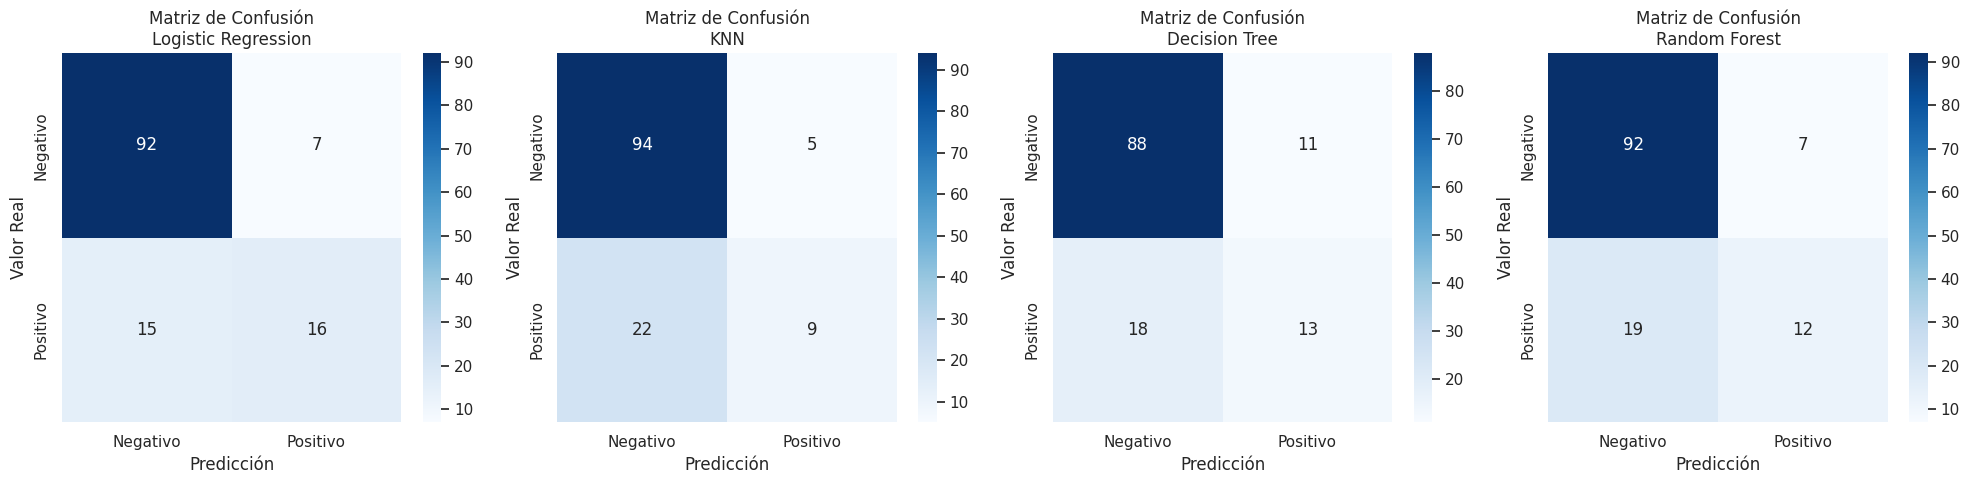


Resultados de los modelos:
                 Model  Accuracy  Cross-Validation Accuracy  Precision  \
0  Logistic Regression  0.830769                   0.855209   0.695652   
1                  KNN  0.792308                   0.859037   0.642857   
2        Decision Tree  0.776923                   0.816486   0.541667   
3        Random Forest  0.800000                   0.857076   0.631579   

     Recall  F1-Score   ROC-AUC  
0  0.516129  0.592593  0.841479  
1  0.290323  0.400000  0.708374  
2  0.419355  0.472727  0.648257  
3  0.387097  0.480000  0.795210  


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que ya hemos aplicado LabelEncoder o OneHotEncoder y preprocesado los datos
# Ahora dividimos las variables dependientes (target) y explicativas (features)
X = df_ohe_f.drop(columns='AI_Satisfication')  # Variables predictoras
y = df_ohe_f['AI_Satisfication']  # Variable dependiente

# Codificar las etiquetas categóricas de y para que algunos modelos no generen error
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Separar en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modelos a entrenar
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Función para plotear matriz de confusión
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negativo', 'Positivo'],
                yticklabels=['Negativo', 'Positivo'])
    plt.title(f'Matriz de Confusión - {title}')
    plt.ylabel('Valor Real')
    plt.xlabel('Predicción')
    plt.show()

# Evaluar los modelos
results = []
# Crear una figura para todas las matrices de confusión
plt.figure(figsize=(20, 5))

for i, (name, model) in enumerate(models, 1):
    # Realizar validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Entrenar el modelo en el conjunto completo de entrenamiento
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_cv = cv_scores.mean()
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Calcular y plotear matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Crear subplot para cada matriz de confusión
    plt.subplot(1, 4, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negativo', 'Positivo'],
                yticklabels=['Negativo', 'Positivo'])
    plt.title(f'Matriz de Confusión\n{name}')
    plt.ylabel('Valor Real')
    plt.xlabel('Predicción')

    # Almacenar resultados
    results.append((name, accuracy, accuracy_cv, precision, recall, f1, roc_auc))

# Ajustar el layout y mostrar todas las matrices
plt.tight_layout()
plt.show()

# Crear DataFrame con los resultados
results_df_ohe = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Cross-Validation Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Mostrar los resultados
print("\nResultados de los modelos:")
print(results_df_ohe)

In [ ]:
!pip install xgboost

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))




Exactitud: 0.7923076923076923
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        99
           1       0.61      0.35      0.45        31

    accuracy                           0.79       130
   macro avg       0.72      0.64      0.66       130
weighted avg       0.77      0.79      0.77       130

Matriz de Confusión:
[[92  7]
 [20 11]]


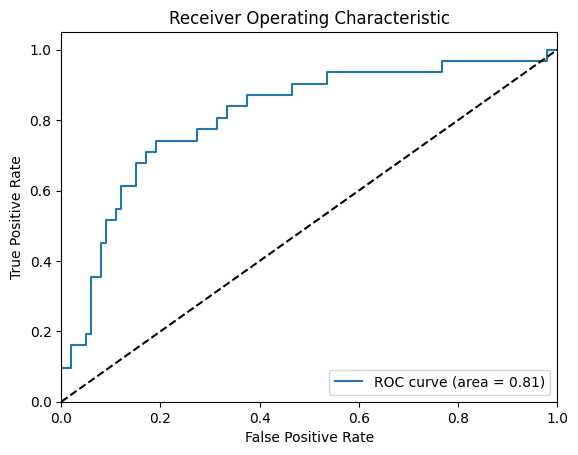

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crear el modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenar el modelo
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print('\n')
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install lightgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 88, number of negative: 430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.169884 -> initscore=-1.586448
[LightGBM] [Info] Start training from score -1.586448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

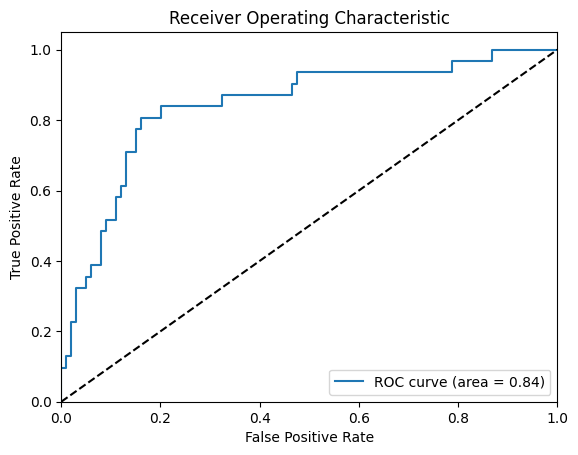

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crear el modelo LightGBM
model = lgb.LGBMClassifier(random_state=42)

# Entrenar el modelo
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print("\n")
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Codificados con LabelEncoder

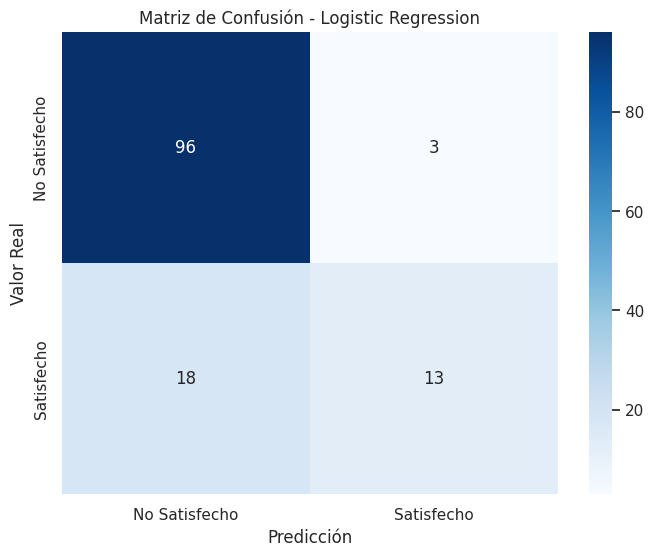


Resultados detallados para Logistic Regression:
Verdaderos Negativos (TN): 96
Falsos Positivos (FP): 3
Falsos Negativos (FN): 18
Verdaderos Positivos (TP): 13


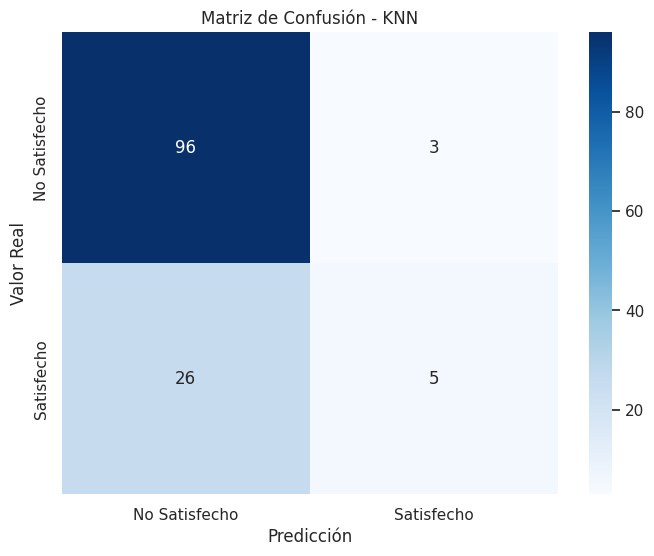


Resultados detallados para KNN:
Verdaderos Negativos (TN): 96
Falsos Positivos (FP): 3
Falsos Negativos (FN): 26
Verdaderos Positivos (TP): 5


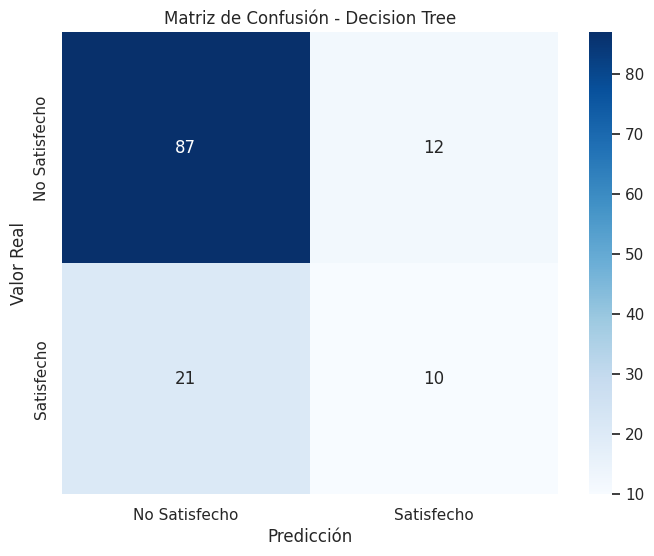


Resultados detallados para Decision Tree:
Verdaderos Negativos (TN): 87
Falsos Positivos (FP): 12
Falsos Negativos (FN): 21
Verdaderos Positivos (TP): 10


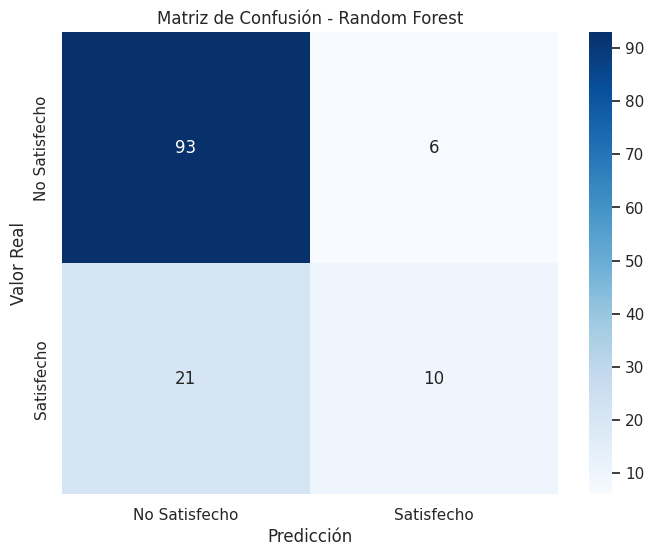


Resultados detallados para Random Forest:
Verdaderos Negativos (TN): 93
Falsos Positivos (FP): 6
Falsos Negativos (FN): 21
Verdaderos Positivos (TP): 10

Resumen de métricas para todos los modelos:
                 Model  Accuracy  Cross-Validation Accuracy  Precision  \
0  Logistic Regression  0.838462                   0.849403   0.812500   
1                  KNN  0.776923                   0.843615   0.625000   
2        Decision Tree  0.746154                   0.818409   0.454545   
3        Random Forest  0.792308                   0.849365   0.625000   

     Recall  F1-Score   ROC-AUC  
0  0.419355  0.553191  0.852884  
1  0.161290  0.256410  0.700880  
2  0.322581  0.377358  0.597263  
3  0.322581  0.425532  0.806289  


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que ya hemos aplicado LabelEncoder o OneHotEncoder y preprocesado los datos
X = df_le_f.drop(columns='AI_Satisfication')  # Variables predictoras
y = df_le_f['AI_Satisfication']  # Variable dependiente

# Codificar las etiquetas categóricas de y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Separar en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modelos a entrenar
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Función para plotear matriz de confusión
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Satisfecho', 'Satisfecho'],
                yticklabels=['No Satisfecho', 'Satisfecho'])
    plt.title(f'Matriz de Confusión - {title}')
    plt.ylabel('Valor Real')
    plt.xlabel('Predicción')
    plt.show()

# Evaluar los modelos
results = []
for name, model in models:
    # Realizar validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Entrenar el modelo en el conjunto completo de entrenamiento
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_cv = cv_scores.mean()
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Calcular y mostrar matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_matrix, name)

    # Imprimir valores de la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f"\nResultados detallados para {name}:")
    print(f"Verdaderos Negativos (TN): {tn}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")
    print(f"Verdaderos Positivos (TP): {tp}")

    # Almacenar resultados
    results.append((name, accuracy, accuracy_cv, precision, recall, f1, roc_auc))

# Crear DataFrame con los resultados
results_df_le = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Cross-Validation Accuracy',
                                             'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Mostrar los resultados generales
print("\nResumen de métricas para todos los modelos:")
print(results_df_le)

In [ ]:
print(type(results_df_le))

<class 'pandas.core.frame.DataFrame'>


## 2) Comparación de Modelos:
- Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).
- Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.

In [ ]:
# Renombramos las columnas para indicar si los resultados son de OHE o LE
results_df_ohe['Encoding'] = 'OHE'
results_df_le['Encoding'] = 'LE'

# Unir ambos DataFrames (resultados de OHE y LE) para compararlos
results_combined = pd.concat([results_df_ohe, results_df_le], ignore_index=True)

# Reordenar las columnas con reindex
new_order = ['Model', 'Encoding', 'Accuracy', 'Cross-Validation Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
results_combined = results_combined.reindex(columns=new_order)
print(results_combined)

                 Model Encoding  Accuracy  Cross-Validation Accuracy  \
0  Logistic Regression      OHE  0.830769                   0.855209   
1                  KNN      OHE  0.792308                   0.859037   
2        Decision Tree      OHE  0.769231                   0.806796   
3        Random Forest      OHE  0.800000                   0.857076   
4  Logistic Regression       LE  0.838462                   0.849403   
5                  KNN       LE  0.776923                   0.843615   
6        Decision Tree       LE  0.769231                   0.814488   
7        Random Forest       LE  0.769231                   0.851288   

   Precision    Recall  F1-Score   ROC-AUC  
0   0.695652  0.516129  0.592593  0.841479  
1   0.642857  0.290323  0.400000  0.708374  
2   0.521739  0.387097  0.444444  0.631802  
3   0.631579  0.387097  0.480000  0.796839  
4   0.812500  0.419355  0.553191  0.852884  
5   0.625000  0.161290  0.256410  0.700880  
6   0.521739  0.387097  0.444444  0.

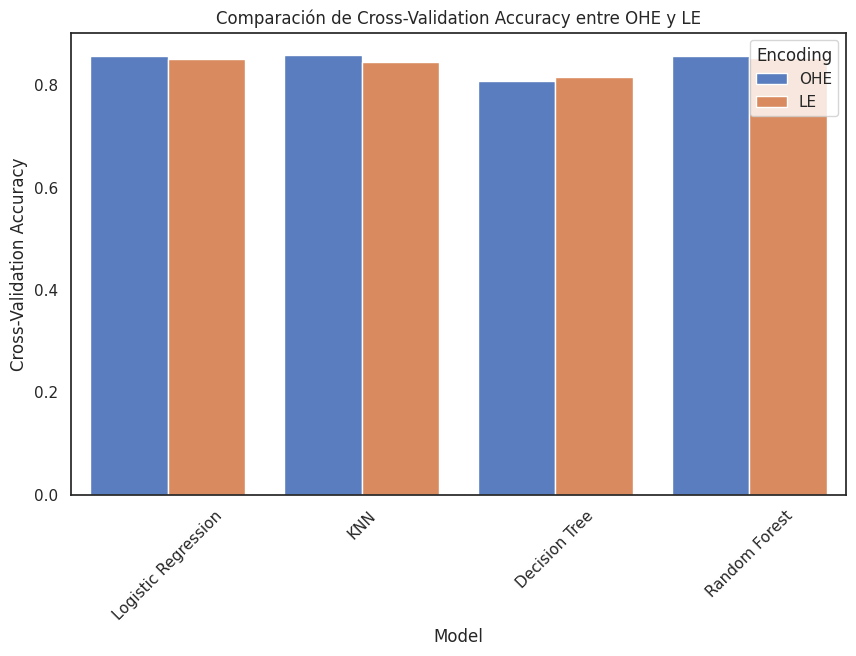

In [ ]:
# Gráfico de barras para comparar la precisión
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Cross-Validation Accuracy', hue='Encoding', data=results_combined)
plt.title('Comparación de Cross-Validation Accuracy entre OHE y LE')
plt.xticks(rotation=45)
plt.show()

### Análisis:
-	Se realizó la carga de los modelos a utilizar, la división de variables independientes y dependientes, en algunos casos se debió codificar también la variable dependiente porque algunos modelos no soportan variables de tipo texto o object, así que lo mejor fue codificarla con LabelEncoder, se realizó la separación de los conjuntos en entrenamiento y prueba, se entrenaron y evaluaron los modelos junto con la validación cruzada calculando las métricas y mostrando finalmente los resultados como un df nuevo, esto se hizo para ambos df dependiendo de la codificación utilizada, los resultados se guardaron como results_df_ohe y results_df_le

-	Por su parte se realizó también XGBoost y LGBM, pero decidí no utilizarlas ya que, en el código completo me generaba error, y cuando se hizo cada uno de estos modelos por separado si se puede observar que hay un montón de advertencias que por fines prácticos no pude revisar por el tiempo, así que se dejó el código con los 4 modelos probados inicialmente, regresión logística, KNN para clasificación, arboles de decisión para clasificación y bosques aleatorios para clasificación.

-	Se agregó una columna a los df resultado para determinar si eran OHE: OneHotEncoder o LE: LabelEncoder, se combinaron los df, se organizaron nuevamente las columnas y se graficó el acuraccy de la validación cruzada

-	A continuación presento los resultados para las métricas de los modelos utilizando las dos codificaciones y dependiendo de si se usan todas las características o las seleccionadas por la asociación de Cramer >0.1:


**TODAS LAS CARACTERÍSTICAS INCLUIDAS**
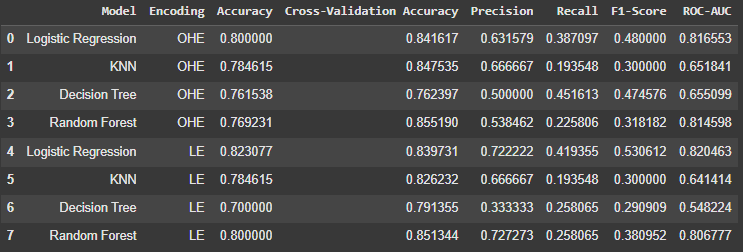

**CARACTERÍSTICAS >0.1 EN LA MEDIDA DE ASOCIACIÓN DE CRAMER INCLUIDAS**
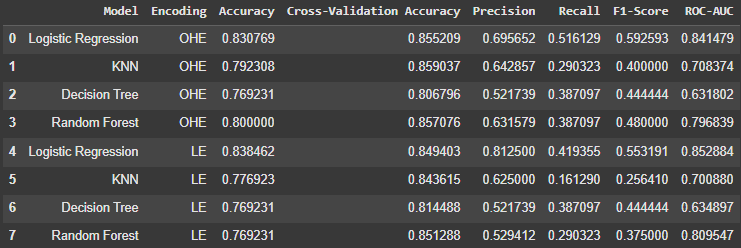


### Análisis:
- Se puede observar que si bien hay diferencias en las métricas para los siguientes análisis, la Accuracy con validación cruzada suele ser más alta que la Accuracy sin validación cruzada, y en general, el usar todas las características da valores más bajos de CVA (Cross-Validation Accuracy o Accuracy con validación cruzada)

-	Precision: Los mejores valores se dan con las características seleccionadas por Cramer>0.1, donde la Regresión Logística con Label Encoding (LE) obtuvo el mejor resultado en precisión con 0.81 (81.25%), lo que significa que cuando predice la clase positiva, acierta el 81.25% de las veces. Con One Hot Encoding (OHE) con 0.69 (69.56%). Mientras que con todas las características fue de 0.72 con LE y 0.63 con OHE

-	Recall: Similar a lo anterior, los valores más altos se dieron la mayoría de las veces en la Regresión Logística, siendo más altas con menos características que con todas, y en este caso con la codificación OHE (0.51) comparado con LE (0.41)

-	F1-Score: Valores más altos con todas o pocas características con Regresión Logística comparados con el resto de modelos, pero los más altos se dan con menos características y un poco similares con OHE: 0.592 (59.26%) y con LE: 0.553 (55.32%)

- ROC-AUC (capacidad general de discriminación): Regresión Logística con LE tiene el mejor ROC-AUC: 0.853 (85.29%) y con OHE muy cercana: 0.841 (84.15%), estos valores son para menos características, mientras que con todas las características los valores fueron menores.

- Similar con las matrices de confusión los mejores valores se dan con la Regresión Logística con pocas características. Posiblemente la diferencia entre el error tipo 1 que suele ser el más alto en todas las matrices, se deba al desbalanceo de clases, ya que la variable objetivo "AI_Satisfication" tiene 537 'Satisfied' (81.86%) y 119 'Unsatisfied' (18,14%)

En conclusión, la Regresión Logística parece ser el mejor modelo para este caso, especialmente con Label Encoding, ya que:

1.	Tiene la mejor Precision

2.	Mantiene un Recall razonable

3.	Muestra el mejor balance en el F1-Score

4.	Tiene el mejor ROC-AUC



# Parte 3: Optimización de Hiperparámetros



## 1) GridSearchCV:
- Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.
- Definir el espacio de búsqueda para los hiperparámetros relevantes.



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el espacio de búsqueda
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 500],
    'class_weight': ['balanced', None]
}

# Inicializar el modelo
log_reg = LogisticRegression()

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Obtener y mostrar los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("\nMejor puntuación:", grid_search.best_score_)

# Evaluar en el conjunto de prueba
y_pred_grid = grid_search.predict(X_test)
print("\nRendimiento en conjunto de prueba:")
print(f"F1 Score: {f1_score(y_test, y_pred_grid)}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Mejores parámetros encontrados:
{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

Mejor puntuación: 0.5675391124744344

Rendimiento en conjunto de prueba:
F1 Score: 0.7142857142857143


## 2) RandomizedSearchCV:
- Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.



In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Definir distribuciones para los parámetros
param_distributions = {
    'C': uniform(loc=0, scale=100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': randint(200, 1000),
    'class_weight': ['balanced', None]
}

# Inicializar el modelo
log_reg = LogisticRegression()

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions,
    n_iter=100,  # número de combinaciones a probar
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Obtener y mostrar los mejores parámetros
print("Mejores parámetros encontrados:")
print(random_search.best_params_)
print("\nMejor puntuación:", random_search.best_score_)

# Evaluar en el conjunto de prueba
y_pred_random = random_search.predict(X_test)
print("\nRendimiento en conjunto de prueba:")
print(f"F1 Score: {f1_score(y_test, y_pred_random)}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros encontrados:
{'C': 37.454011884736246, 'class_weight': 'balanced', 'max_iter': 470, 'penalty': 'l1', 'solver': 'saga'}

Mejor puntuación: 0.5149438684564734

Rendimiento en conjunto de prueba:
F1 Score: 0.6857142857142857


## 3) Optuna:
- Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.


In [21]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.3 MB/s eta 0:00:00


In [22]:
!pip install --quiet optuna

In [23]:
import optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Definir el espacio de búsqueda
    params = {
        'C': trial.suggest_float('C', 1e-4, 1e2, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 200, 1000),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }

    # Crear y entrenar el modelo
    model = LogisticRegression(**params)

    # Usar validación cruzada para evaluar
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    return scores.mean()

# Crear el estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Obtener los mejores parámetros
best_params = study.best_params
print("Mejores parámetros encontrados:")
print(best_params)
print("\nMejor puntuación:", study.best_value)

# Entrenar el modelo final con los mejores parámetros
final_model = LogisticRegression(**best_params)
final_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred_optuna = final_model.predict(X_test)
print("\nRendimiento en conjunto de prueba:")
print(f"F1 Score: {f1_score(y_test, y_pred_optuna)}")

[I 2025-01-14 17:21:02,305] A new study created in memory with name: no-name-5590db2d-bbec-4e50-8fb0-25bfad19f4b9
[I 2025-01-14 17:21:02,475] Trial 0 finished with value: 0.4385697940503432 and parameters: {'C': 0.0006199944261926868, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 513, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.4385697940503432.
[I 2025-01-14 17:21:02,579] Trial 1 finished with value: 0.0 and parameters: {'C': 0.010961307095430273, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 246, 'class_weight': None}. Best is trial 0 with value: 0.4385697940503432.
[I 2025-01-14 17:21:02,703] Trial 2 finished with value: 0.5149438684564734 and parameters: {'C': 15.644194585884872, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 472, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.5149438684564734.
[I 2025-01-14 17:21:02,772] Trial 3 finished with value: 0.0 and parameters: {'C': 0.0003150197483986574, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 253

Mejores parámetros encontrados:
{'C': 0.18038217140737664, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 200, 'class_weight': 'balanced'}

Mejor puntuación: 0.5600895094880057

Rendimiento en conjunto de prueba:
F1 Score: 0.6857142857142857


## 4) Evaluación de Modelos Optimizados:
- Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.
- Comparar el rendimiento del modelo optimizado con el modelo inicial.

In [24]:
from sklearn.metrics import classification_report

# Crear diccionario con todos los modelos
models = {
    'Original': LogisticRegression().fit(X_train, y_train),
    'GridSearch': grid_search.best_estimator_,
    'RandomSearch': random_search.best_estimator_,
    'Optuna': final_model
}

# Comparar resultados
results_comparison = []

for name, model in models.items():
    # Predecir
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_comparison.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Crear DataFrame con resultados
comparison_df = pd.DataFrame(results_comparison)
print("Comparación de modelos:")
print(comparison_df)

# Mostrar reporte detallado para el mejor modelo
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"\nReporte detallado del mejor modelo ({best_model_name}):")
print(classification_report(y_test, y_pred_best))

Comparación de modelos:
          Model  Accuracy  Precision    Recall  F1-Score
0      Original  0.838462   0.812500  0.419355  0.553191
1    GridSearch  0.846154   0.641026  0.806452  0.714286
2  RandomSearch  0.830769   0.615385  0.774194  0.685714
3        Optuna  0.830769   0.615385  0.774194  0.685714

Reporte detallado del mejor modelo (GridSearch):
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        99
           1       0.64      0.81      0.71        31

    accuracy                           0.85       130
   macro avg       0.79      0.83      0.80       130
weighted avg       0.86      0.85      0.85       130



### Análisis:
-	Se realizaron los códigos para las tres optimizaciones sugeridas, y se hizo la comparación guardando todo en una lista, de modo que se convierta en un DataFrame para observar los resultados, y basados en el F1-Score seleccionar el mejor modelo, ya que si vemos del modelo original al optimizado con GridSearch, pasamos de 0.55 a 0.71

-	Aquí algunas consideraciones más:

-	Pese a tener hiperparámetros diferentes, los últimos dos modelos dieron resultados similares, el Accuracy fue mejor para GridSearch (84.62%), y en ambos casos se realizó validación cruzada

-	El F1-Score fue mejor en GridSearch (71.43%), donde también el balance entre Precision y Recall fue mejor aquí, y en los otros dos modelos optimizados también se dieron buenos resultados de estas variables, pero se escogió el GridSearch

-	Si se analiza el reporte detallado, para la clase 0 (No satisfecho) hay mejores valores que para la clase 1 (Satisfecho), con la mejor configuración de hiperparámetros, es notable el desbalance de clases (99/31), por lo que el modelo será mejor identificando casos de “No satisfecho” que los de “Satisfecho”


# Parte 4: Documentación y Entrega

1. Documentación del Proceso:

- Documentar todos los pasos del preprocesamiento, selección de técnica y optimización en un notebook de Jupyter.

- Incluir explicaciones detalladas y justificaciones para cada decisión tomada.

2. Subida a GitHub:

- Actualizar el repositorio de GitHub con los notebooks de preprocesamiento, selección de técnica y optimización.

- Incluir los resultados de la optimización y la comparación de modelos.

- Crear un tag de liberación (v2.0.0) para esta versión del proyecto.

https://www.kaggle.com/cdeotte/code

https://www.kaggle.com/alexisbcook/code
